# Weather Prediction using Machine Learning Model

Utilizing NOAA's (https://www.ncdc.noaa.gov/cdo-web/search) database of past weather and climate data, we can predict the weather and temperature within a given range.

This notebook focuses on the temperature in NYC from 1970 to around late 2022.

## __Set up__
* Import all necessary libraries and datset.

In [13]:
import pandas as pd
import matplotlib

weather = pd.read_csv('./lsda/data/weather.csv', index_col='DATE')
weather.index = pd.to_datetime(weather.index) # convert DATE from type: object to type: datetime
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,9.62,NaN,NaN,0.08,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,12.08,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,14.99,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## __Preprocessing__

When initially viewing the dataset, there are many NULL values present in the columns. In order to begin working with the data, this must be cleaned first.

In [14]:
'''
Q: Why are there so many NULL values???
A: This dataset was retrieved from the National Oceanic and Atmospheric Administration, a US government agency. It is plausbile that the tech for some of these sensors did not exist at the time or just simply were not installed yet.
'''

# Sum of null values of a column / total number of rows = null percent of a row
null_percent = weather.apply(pd.isnull).sum()/weather.shape[0] 
null_percent

STATION    0.000000
NAME       0.000000
ACMH       0.501478
ACSH       0.501426
AWND       0.265256
FMTM       0.475087
PGTM       0.363872
PRCP       0.000000
SNOW       0.000000
SNWD       0.000104
TAVG       0.680406
TMAX       0.000000
TMIN       0.000000
TSUN       0.998393
WDF1       0.501685
WDF2       0.498678
WDF5       0.502981
WDFG       0.734484
WDFM       0.999948
WESD       0.685228
WSF1       0.501530
WSF2       0.498678
WSF5       0.503033
WSFG       0.613055
WSFM       0.999948
WT01       0.630217
WT02       0.935034
WT03       0.933271
WT04       0.982579
WT05       0.981127
WT06       0.990615
WT07       0.994400
WT08       0.796962
WT09       0.992741
WT11       0.999274
WT13       0.886711
WT14       0.954010
WT15       0.997822
WT16       0.658993
WT17       0.996889
WT18       0.939493
WT21       0.999741
WT22       0.997459
WV01       0.999948
dtype: float64

### __Dealing with NULL values__
Extract the columns (`valid_columns`) by only accept columns where the `null_percent` is less than the `NULL_THRESHOLD`

All of the chosen columns should have NO null values except for **SNWD**

In [15]:
NULL_THRESHOLD = 0.01

valid_columns = weather.columns[null_percent < NULL_THRESHOLD]

weather = weather[valid_columns].copy()
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43


### __SNWD (Snow Depth) Fill In__

Snow is something that is (or was) very common in New York so it's important to mainatin this data for predictions. However, Snow Depth does have some NULL values so we can utilize `.ffill()` to "guess" the snow depth.

`.ffill()` = Fill NA/NaN values by propagating the last valid observation to next valid.

In [16]:
weather = weather.ffill()

null_percent = weather.apply(pd.isnull).sum()/weather.shape[0] 
null_percent

STATION    0.0
NAME       0.0
PRCP       0.0
SNOW       0.0
SNWD       0.0
TMAX       0.0
TMIN       0.0
dtype: float64

### __Creating TARGETs for the model__

Create a column called `TARGET` which will be the previous day's `TMAX`. This will serve as the baseline for predictions as by nature, the weather of the previous day is correlated to the next days.

In [17]:
weather['target'] = weather.shift(-1)['TMAX']
weather = weather.ffill() # This choice is a bit iffy, we are filling in the NULL value with a incorrect value. But with such a large dataseet, I hope this only makes a neglectible difference to the predictions.

## __EDA__
Basic visualization of the data

/var/folders/nf/xhd092257nx_p1cp4wt9pghr0000gn/T/ipykernel_47878/2932189641.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather.corr().plot()


<Axes: >

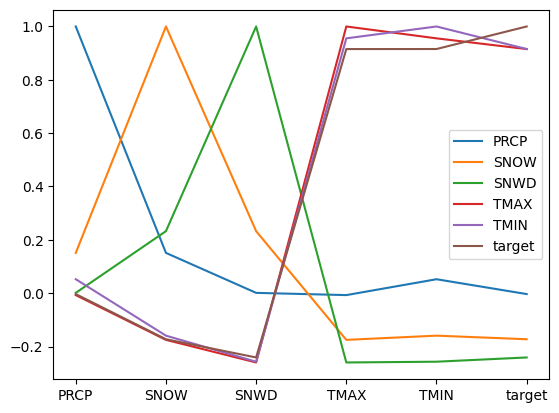

In [18]:
weather.corr().plot()

## __Determining model & techniques__

By creating a correlation matrix of the dataset, TMAX and TMIN are 0.95 highly correlated which suggests collinearity between these two attributes. 

Collinearity may pose an issue with statistical analysis so the model that seems most appropriate is **Ridge Regression** which handles multicollinearity.

Another important thing to note is weather date is __**TIME SENSITIVE**__. The weather of today is highly correlated to the weather of yesteday. When we cross validate, or test/evaluate our model, we **CANNOT** use future data to influence the past. So we must use time-sensitive cross validation.

In [19]:
weather.corr()

/var/folders/nf/xhd092257nx_p1cp4wt9pghr0000gn/T/ipykernel_47878/2900882895.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather.corr()


,PRCP,SNOW,SNWD,TMAX,TMIN,target
PRCP,1.000000,0.151051,0.001178,-0.007210,0.052279,-0.003358
SNOW,0.151051,1.000000,0.232567,-0.175075,-0.159285,-0.172737
SNWD,0.001178,0.232567,1.000000,-0.259858,-0.256977,-0.241054
TMAX,-0.007210,-0.175075,-0.259858,1.000000,0.955487,0.915296
TMIN,0.052279,-0.159285,-0.256977,0.955487,1.000000,0.915461
target,-0.003358,-0.172737,-0.241054,0.915296,0.915461,1.000000


## __Apply Ridge Regression Model__

In [20]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1) # constant to multiply L2 term, usually called lambda but its taken python keyword

In [21]:
# Numeric columns that are used for cross validation, more predictors = improve model
predictors = weather.columns[~weather.columns.isin(['NAME', 'STATION', 'TARGET'])] 
predictors

Index(['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'target'], dtype='object')

### __Implementation of Time-Sensitive Cross Validation__

In [22]:
def cross_validate(df: pd.DataFrame, ridge_model: Ridge, predictors: pd.Index , start: int, steps: int) -> pd.DataFrame:
    """
    Perform cross-validation using Ridge Regression, adjusted for time senstive dataframes.
    
    Parameters
    --------------
    - df (pd.DataFrame): The DataFrame containing the dataset
    - ridge_model (Ridge): Ridge Regression model
    - predictors (pd.Index): The predictors that the model will use (in a pandas Index)
    - start (int): Starting index for each iteration of cross-validation
    - steps (int): # of steps/rows to observe for each test set iteration
    
    Returns
    --------------
    - pd.DataFrame: A DataFrame containg the actual temperature vs model-predicted temperature with the difference between the two.
    """
    predictions = []
    
    for i in range(start, df.shape[0], steps):
        training_set = df.iloc[:i, :]
        testing_set = df.iloc[i:(i + steps), :]
        
        ridge_model.fit(training_set[predictors], training_set['target'])
        
        generated_predictions = ridge_model.predict(testing_set[predictors])
        generated_predictions = pd.Series(generated_predictions, index = testing_set.index)
        
        result = pd.concat([testing_set['target'], generated_predictions], axis=1)
    
        result.columns = ['ACTUAL', 'PREDICTION']
        result['DIFFERENCE'] = (result['ACTUAL'] - result['PREDICTION']).abs()
        
        predictions.append(result)
        
    return pd.concat(predictions)

In [23]:
predictions = cross_validate(weather, ridge, predictors, 3650, 60)
predictions

,ACTUAL,PREDICTION,DIFFERENCE
DATE,,,
1979-12-30,43.0,43.000005,4.559387e-06
1979-12-31,42.0,42.000001,1.055630e-06
1980-01-01,41.0,41.000000,3.652581e-07
1980-01-02,36.0,36.000005,5.021399e-06
1980-01-03,30.0,30.000006,6.435912e-06
...,...,...,...
2022-10-17,58.0,58.000001,1.149925e-06
2022-10-18,56.0,56.000001,5.436850e-07
2022-10-19,61.0,61.000000,4.780887e-07


# __Future Steps__

* As NOAA only allows for 1.00GB exports, requesting data for countries is impossible. Gaining access to much larger datasets with around 100GB+ in size will allow for a deeper level of training to take place.
* Begin predicting different features such as condition, snow depth, etc.
* Migrate to the cloud, allowing all processing to be done on the cloud
* Create basic UI 
* Modular functionality, not limited to a single area. Maybe will require a scraper.
* Flight with Weather Data